# Using MLP Classifier
Resources:<br>
https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html<br>
<br>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier

### Read Data sets and create validation set (15% of training set)

In [9]:
data = pd.read_csv("../dataset/csv/mnist_train.csv", header=None)

size_data = len(data)
data = data.sample(size_data)
limit = math.floor(3*size_data/20)

validation_data = data[:limit]
train_data = data[limit:]

test_data = pd.read_csv("../dataset/csv/mnist_test.csv", header=None)

### Create sparse matrix of shape and classification for train, validation and test data

In [10]:
# The division by 255 transforms integers in floats to have a better percision
train_sparse_matrix = train_data.iloc[:,1:].values/255
train_sparse_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
train_classes = train_data.iloc[:,0:1].values.ravel()
train_classes

array([2, 1, 3, ..., 8, 8, 7])

In [12]:
validation_sparse_matrix = validation_data.iloc[:,1:].values/255
validation_classes = validation_data.iloc[:,0:1].values.ravel()

test_sparse_matrix = test_data.iloc[:,1:].values/255
test_classes = test_data.iloc[:,0:1].values.ravel()

## Use MLP Classifier
### Define functions for accuracy and loss

In [13]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    
    return diagonal_sum / sum_of_all_elements

In [20]:
# For the loss of the classifier, we use the cross-entropy
def loss_function(data_pred, data_classes):
    loss = 0
#     for i in range(len(data_classes)):
#         if (data_pred[i] != data_classes[i]):
#             loss += 1
#     loss = loss/len(data_classes)

#     print(data_classes)
#     print(np.log(data_pred))

#     print(np.dot(data_classes, np.log(data_pred)))
    
    temp = 0
    for i in range(len(data_classes)):
        print("data_classes[i]: {}".format(data_classes[i]))
        print("data_pred[i]: {}".format(data_pred[i]))
        print("log data_pred[i]: {}".format(np.log(data_pred)[i]))
        print("product: {}".format(data_classes[i]*np.log(data_pred)[i]))
        
        temp += data_classes[i]*np.log(data_pred)[i]
        print(temp)
        print()
    
    loss = -np.dot(data_classes, np.log(data_pred))
    
    return loss

### Function to initialize and optimize classifier

In [15]:
def create_classifier(num_hl, learning_rate, max_iter):
    return MLPClassifier(hidden_layer_sizes=(num_hl), max_iter=max_iter, activation = 'relu', solver='adam', learning_rate='constant', learning_rate_init=learning_rate, random_state=1)


In [16]:
def classification(max_iter, nhl, lr): 
    
    classification_results = pd.DataFrame(columns=['nhl', 'lr', 'acc_valid', 'loss_valid', 'acc_train', 'loss_train'])
    
    classifier = create_classifier(nhl, lr, max_iter) 
    
#   Training network
    classifier.fit(train_sparse_matrix, train_classes)

#             Validation set
    validation_pred = classifier.predict(validation_sparse_matrix)
    
    cm_valid = confusion_matrix(validation_pred, validation_classes)            
    acc_valid = accuracy(cm_valid)
    print("Accuracy valid: {}".format(acc_valid))
    
    print("Loss: {}".format(classifier.loss_))
    loss_valid = classifier.loss_
#     loss_valid = loss_function(validation_pred, validation_classes)



#             Training set
    train_pred = classifier.predict(train_sparse_matrix)
    
    cm_train = confusion_matrix(train_pred, train_classes)
    acc_train = accuracy(cm_train)
    print("\nAccuracy train: {}".format(acc_train))
    
    print("Loss: {}\n-----\n".format(classifier.loss_))
#     loss_train = loss_function(train_pred, train_classes)
    loss_train = classifier.loss_

    classification_results.loc[len(classification_results)] = [nhl, lr, acc_valid, loss_valid, acc_train, loss_train]

    return classification_results

In [17]:
def classification_test(max_iter, nhl, lr): 
    
    classification_results = pd.DataFrame(columns=['nhl', 'lr', 'acc', 'loss'])
    
    classifier = create_classifier(nhl, lr, max_iter) 
#   Learning
    classifier.fit(train_sparse_matrix, train_classes)

#             Test set
    test_pred = classifier.predict(test_sparse_matrix)
    cm = confusion_matrix(test_pred, test_classes)            
    acc = accuracy(cm)
    loss = loss_function(test_pred, test_classes)

    classification_results.loc[len(classification_results)] = [nhl, lr, acc, loss]

    return classification_results

/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8196666666666667
Loss: 0.849171232536527

Accuracy train: 0.8263921568627451
Loss: 0.849171232536527
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8337777777777777
Loss: 0.6326825608908526

Accuracy train: 0.8408235294117647
Loss: 0.6326825608908526
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8251111111111111
Loss: 0.6081080815062033

Accuracy train: 0.831078431372549
Loss: 0.6081080815062033
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8025555555555556
Loss: 0.6095700567782575

Accuracy train: 0.8101176470588235
Loss: 0.6095700567782575
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8344444444444444
Loss: 0.5896129919240471

Accuracy train: 0.8412156862745098
Loss: 0.5896129919240471
-----


Number neurons in hidden layer: 10
learning rate: 0.1

   iter  acc_valid  loss_valid  acc_train  loss_train
0   1.0   0.819667    0.849171   0.826392    0.849171
1   2.0   0.833778    0.632683   0.840824    0.632683
2   3.0   0.825111    0.608108   0.831078    0.608108
3   4.0   0.802556    0.609570   0.810118    0.609570
4   5.0   0.834444    0.589613   0.841216    0.589613


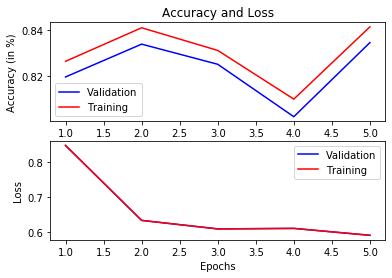


------------------------------------------------------



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9055555555555556
Loss: 0.48047328171749615

Accuracy train: 0.9057254901960784
Loss: 0.48047328171749615
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9122222222222223
Loss: 0.3054363215885954

Accuracy train: 0.9206666666666666
Loss: 0.3054363215885954
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9132222222222223
Loss: 0.27911334886740596

Accuracy train: 0.9201372549019607
Loss: 0.27911334886740596
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9188888888888889
Loss: 0.26807689148916575

Accuracy train: 0.9298823529411765
Loss: 0.26807689148916575
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9131111111111111
Loss: 0.2542824864493181

Accuracy train: 0.9264705882352942
Loss: 0.2542824864493181
-----


Number neurons in hidden layer: 10
learning rate: 0.01

   iter  acc_valid  loss_valid  acc_train  loss_train
0   1.0   0.905556    0.480473   0.905725    0.480473
1   2.0   0.912222    0.305436   0.920667    0.305436
2   3.0   0.913222    0.279113   0.920137    0.279113
3   4.0   0.918889    0.268077   0.929882    0.268077
4   5.0   0.913111    0.254282   0.926471    0.254282


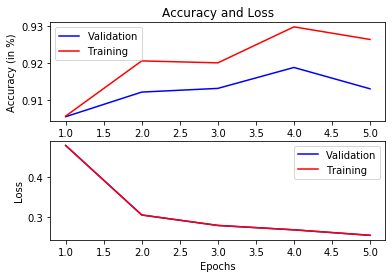


------------------------------------------------------



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.874
Loss: 1.0197450727637767

Accuracy train: 0.8690196078431373
Loss: 1.0197450727637767
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8976666666666666
Loss: 0.42526243993777096

Accuracy train: 0.8977450980392156
Loss: 0.42526243993777096
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9063333333333333
Loss: 0.35415103280679

Accuracy train: 0.9077843137254902
Loss: 0.35415103280679
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9101111111111111
Loss: 0.3233254708621443

Accuracy train: 0.9134901960784314
Loss: 0.3233254708621443
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9146666666666666
Loss: 0.30522370310714897

Accuracy train: 0.9182745098039216
Loss: 0.30522370310714897
-----


Number neurons in hidden layer: 10
learning rate: 0.001

   iter  acc_valid  loss_valid  acc_train  loss_train
0   1.0   0.874000    1.019745   0.869020    1.019745
1   2.0   0.897667    0.425262   0.897745    0.425262
2   3.0   0.906333    0.354151   0.907784    0.354151
3   4.0   0.910111    0.323325   0.913490    0.323325
4   5.0   0.914667    0.305224   0.918275    0.305224


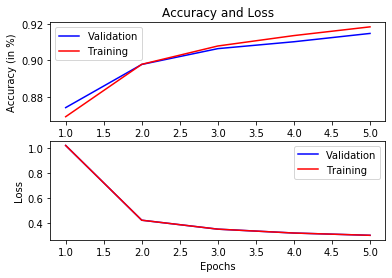


------------------------------------------------------



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8866666666666667
Loss: 0.7098159783052052

Accuracy train: 0.8932941176470588
Loss: 0.7098159783052052
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8978888888888888
Loss: 0.446898340507546

Accuracy train: 0.9071176470588236
Loss: 0.446898340507546
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8922222222222222
Loss: 0.446244576367392

Accuracy train: 0.9036862745098039
Loss: 0.446244576367392
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9065555555555556
Loss: 0.4271575504275473

Accuracy train: 0.9132941176470588
Loss: 0.4271575504275473
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8806666666666667
Loss: 0.44005408844804794

Accuracy train: 0.8881372549019608
Loss: 0.44005408844804794
-----


Number neurons in hidden layer: 50
learning rate: 0.1

   iter  acc_valid  loss_valid  acc_train  loss_train
0   1.0   0.886667    0.709816   0.893294    0.709816
1   2.0   0.897889    0.446898   0.907118    0.446898
2   3.0   0.892222    0.446245   0.903686    0.446245
3   4.0   0.906556    0.427158   0.913294    0.427158
4   5.0   0.880667    0.440054   0.888137    0.440054


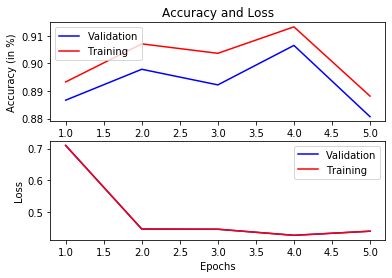


------------------------------------------------------



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9413333333333334
Loss: 0.28534315737304744

Accuracy train: 0.9510392156862745
Loss: 0.28534315737304744
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9602222222222222
Loss: 0.13788428123263458

Accuracy train: 0.9705686274509804
Loss: 0.13788428123263458
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9593333333333334
Loss: 0.10616787695577364

Accuracy train: 0.9726862745098039
Loss: 0.10616787695577364
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9626666666666667
Loss: 0.0893176002342894

Accuracy train: 0.9792156862745098
Loss: 0.0893176002342894
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9602222222222222
Loss: 0.07758558513689413

Accuracy train: 0.9786666666666667
Loss: 0.07758558513689413
-----


Number neurons in hidden layer: 50
learning rate: 0.01

   iter  acc_valid  loss_valid  acc_train  loss_train
0   1.0   0.941333    0.285343   0.951039    0.285343
1   2.0   0.960222    0.137884   0.970569    0.137884
2   3.0   0.959333    0.106168   0.972686    0.106168
3   4.0   0.962667    0.089318   0.979216    0.089318
4   5.0   0.960222    0.077586   0.978667    0.077586


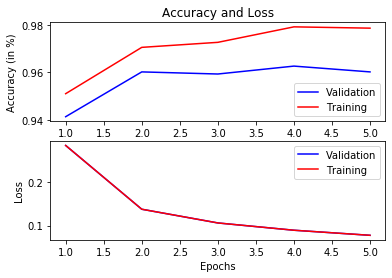


------------------------------------------------------



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.913
Loss: 0.5568279354260666

Accuracy train: 0.9167254901960784
Loss: 0.5568279354260666
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9308888888888889
Loss: 0.269557139249144

Accuracy train: 0.9371176470588235
Loss: 0.269557139249144
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9403333333333334
Loss: 0.218376666394545

Accuracy train: 0.9466666666666667
Loss: 0.218376666394545
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9476666666666667
Loss: 0.18330474581874381

Accuracy train: 0.9546862745098039
Loss: 0.18330474581874381
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9498888888888889
Loss: 0.1569935585915599

Accuracy train: 0.9605490196078431
Loss: 0.1569935585915599
-----


Number neurons in hidden layer: 50
learning rate: 0.001

   iter  acc_valid  loss_valid  acc_train  loss_train
0   1.0   0.913000    0.556828   0.916725    0.556828
1   2.0   0.930889    0.269557   0.937118    0.269557
2   3.0   0.940333    0.218377   0.946667    0.218377
3   4.0   0.947667    0.183305   0.954686    0.183305
4   5.0   0.949889    0.156994   0.960549    0.156994


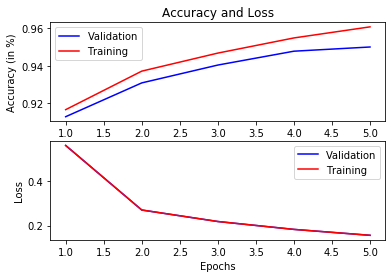


------------------------------------------------------



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.886
Loss: 0.7725947292891249

Accuracy train: 0.8959411764705882
Loss: 0.7725947292891249
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8837777777777778
Loss: 0.44970568284221113

Accuracy train: 0.8851176470588236
Loss: 0.44970568284221113
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8993333333333333
Loss: 0.45981433837800234

Accuracy train: 0.9047843137254902
Loss: 0.45981433837800234
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.8948888888888888
Loss: 0.4503704633035564

Accuracy train: 0.905
Loss: 0.4503704633035564
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9005555555555556
Loss: 0.4602976459247749

Accuracy train: 0.9128627450980392
Loss: 0.4602976459247749
-----


Number neurons in hidden layer: 100
learning rate: 0.1

   iter  acc_valid  loss_valid  acc_train  loss_train
0   1.0   0.886000    0.772595   0.895941    0.772595
1   2.0   0.883778    0.449706   0.885118    0.449706
2   3.0   0.899333    0.459814   0.904784    0.459814
3   4.0   0.894889    0.450370   0.905000    0.450370
4   5.0   0.900556    0.460298   0.912863    0.460298


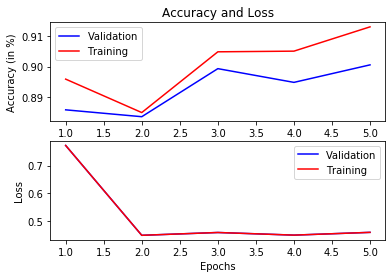


------------------------------------------------------



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9474444444444444
Loss: 0.24526585607627027

Accuracy train: 0.9572745098039216
Loss: 0.24526585607627027
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9623333333333334
Loss: 0.10917205624853181

Accuracy train: 0.9750392156862745
Loss: 0.10917205624853181
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9604444444444444
Loss: 0.08144341440999567

Accuracy train: 0.977392156862745
Loss: 0.08144341440999567
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9692222222222222
Loss: 0.06477617864991647

Accuracy train: 0.9852745098039216
Loss: 0.06477617864991647
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9646666666666667
Loss: 0.059324383893831274

Accuracy train: 0.9828627450980392
Loss: 0.059324383893831274
-----


Number neurons in hidden layer: 100
learning rate: 0.01

   iter  acc_valid  loss_valid  acc_train  loss_train
0   1.0   0.947444    0.245266   0.957275    0.245266
1   2.0   0.962333    0.109172   0.975039    0.109172
2   3.0   0.960444    0.081443   0.977392    0.081443
3   4.0   0.969222    0.064776   0.985275    0.064776
4   5.0   0.964667    0.059324   0.982863    0.059324


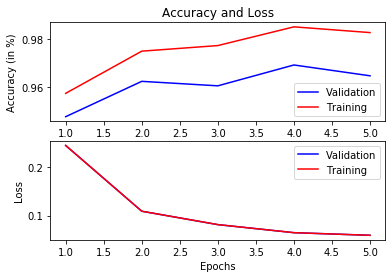


------------------------------------------------------



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9234444444444444
Loss: 0.4689102832990221

Accuracy train: 0.9301960784313725
Loss: 0.4689102832990221
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9431111111111111
Loss: 0.22253794185844128

Accuracy train: 0.9490196078431372
Loss: 0.22253794185844128
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.952
Loss: 0.16454188236711753

Accuracy train: 0.960156862745098
Loss: 0.16454188236711753
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9611111111111111
Loss: 0.13068216244322087

Accuracy train: 0.970078431372549
Loss: 0.13068216244322087
-----



/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy valid: 0.9631111111111111
Loss: 0.1084525395283408

Accuracy train: 0.9745686274509804
Loss: 0.1084525395283408
-----


Number neurons in hidden layer: 100
learning rate: 0.001

   iter  acc_valid  loss_valid  acc_train  loss_train
0   1.0   0.923444    0.468910   0.930196    0.468910
1   2.0   0.943111    0.222538   0.949020    0.222538
2   3.0   0.952000    0.164542   0.960157    0.164542
3   4.0   0.961111    0.130682   0.970078    0.130682
4   5.0   0.963111    0.108453   0.974569    0.108453


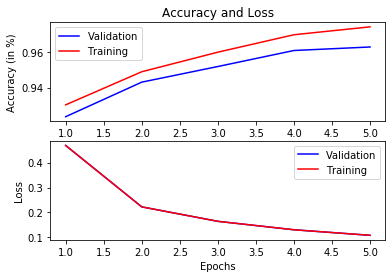


------------------------------------------------------



In [18]:
# Different number Hidden Layers and Learning rates to find the best classifier
nhl_range = [10, 50, 100]
learning_rates = [0.1, 0.01, 0.001]

# We loop over the different parameters
for nhl in nhl_range:
        for lr in learning_rates:
#             Table containing the results
            classification_epoch = pd.DataFrame(columns=['iter', 'acc_valid', 'loss_valid', 'acc_train', 'loss_train'])
                        
            for m in range (1,6):
                acc_loss_m = classification(m, nhl, lr)
                classification_epoch.loc[len(classification_epoch)] = [m, acc_loss_m['acc_valid'][0], acc_loss_m['loss_valid'][0], acc_loss_m['acc_train'][0], acc_loss_m['loss_train'][0]]
    
            print("\nNumber neurons in hidden layer: {}".format(nhl))
            print("learning rate: {}\n".format(lr))
            print(classification_epoch)

            plt.subplot(2,1,1)
            plt.title("Accuracy and Loss")
            plt.xlabel("Epochs")
            plt.ylabel("Accuracy (in %)")
            plt.plot(classification_epoch['iter'], classification_epoch['acc_valid'], "-b", label='Validation')
            plt.plot(classification_epoch['iter'], classification_epoch['acc_train'], "-r", label='Training')
            plt.legend()

            plt.subplot(2,1,2)
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.plot(classification_epoch['iter'], classification_epoch['loss_valid'], "-b", label='Validation')
            plt.plot(classification_epoch['iter'], classification_epoch['loss_train'], "-r", label='Training')
            plt.legend()

            plt.show()
            print("\n------------------------------------------------------\n")

            
# classification_test(optimal_iter, optimal_nhl, optimal_lr)

After this validation phase, when we look at the previous tests, we clearly see that the best learning rate is 0.001 (the bigger ones give completely divergent accuracy).<br>
For the number of neurons in the hidden layer, the best choice is 100.<br>
<br>
Now we want to to the MLP classification with the test set.

In [21]:
optimal_nhl = 100
optimal_learning_rate = 0.001
max_iter = 15

classification_epoch = pd.DataFrame(columns=['iter', 'acc', 'loss'])
acc_loss_m = classification_test(max_iter, optimal_nhl, optimal_learning_rate)
classification_epoch.loc[len(classification_epoch)] = [max_iter, acc_loss_m['acc'][0], acc_loss_m['loss'][0]]

final_accuracy = classification_epoch['acc'][0]*100

print("Accuracy of MLP classifier with optimized parameter values: %.3f" % final_accuracy, '%')

/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply
/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
13.621371043387192

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
15.007665404507083

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
15.007665404507083

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
na

nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.

product: 13.621371043387192
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791

nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0

nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_class

nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 4
data_pred[i]: 4
log

log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 6
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 9.656627474604601
nan

d

log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 7
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 14.55609079175885
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192


product: 16.635532333438686
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6

data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 4
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 7.16703787691222
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 8
data_pred[i]: 8


product: nan
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 5
data_pred

nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.77

nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.6

nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 6
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log 

nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log 

log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 9
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
produc

product: 3.295836866004329
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_cla

product: nan
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 5
data_pre

nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 9
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 17.51319134149782
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_clas

log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 1
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 0.6931471805599453
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 2

product: 0.0
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
na

log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.19722

log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 5
data_

product: 8.788898309344878
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes

log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 3
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 4.828313737302301
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i

log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 9
data_pred[i]: 0
log data_pred[i]: -inf
product: -inf
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pr

log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan



product: 5.545177444479562
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545

product: 19.775021196025975
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 6
data_pred[i

product: 1.3862943611198906
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_clas

nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.5

product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 7
data_pred[

product: 10.75055681536833
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan

nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 2.0794415416798357
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_cla

nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 8
data_pred[i]: 8
log 

log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 4.1588830833596715
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 2
data_pred[i]: 2
log data

log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[

log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 0
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 0.0
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 7
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 15.380572041353537
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.7505568153

product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75

log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 2
d

log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i

log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 3
dat

nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_clas

nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228

log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
pr

nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.

log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product

nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 8
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 12.875503299472802
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]:

log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i

nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_class

product: 1.3862943611198906
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.09861

log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
produc

nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
lo

nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_c

product: 8.047189562170502
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 0
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
n

product: 4.1588830833596715
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]: 1.9459101490553132
product: 13.621371043387192
nan

data_classes[i]: 8
data_pred[i]: 8
log data_pred[i]: 2.0794415416798357
product: 16.635532333438686
nan

data_classes[i]: 0
data_pred[i]: 0
log data_pred[i]: -inf
product: nan
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295

log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 5
data_pred[i]: 5
log data_pred[i]: 1.6094379124341003
product: 8.047189562170502
nan

data_classes[i]: 2
data_pred[i]: 2
log data_pred[i]: 0.6931471805599453
product: 1.3862943611198906
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 9
data_pred[i]: 9
log data_pred[i]: 2.1972245773362196
product: 19.775021196025975
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 3
data_pred[i]: 3
log data_pred[i]: 1.0986122886681098
product: 3.295836866004329
nan

data_classes[i]: 6
data_pred[i]: 6
log data_pred[i]: 1.791759469228055
product: 10.75055681536833
nan

data_classes[i]: 4
data_pred[i]: 4
log data_pred[i]: 1.3862943611198906
product: 5.545177444479562
nan

data_classes[i]: 1
data_pred[i]: 1
log data_pred[i]: 0.0
product: 0.0
nan

data_classes[i]: 7
data_pred[i]: 7
log data_pred[i]:

/Users/nanaeaubry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
